In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
airline = pd.read_csv('/home/sushil/Documents/Assingment/Clust-Ass7/EastWestAirlines.csv')

In [4]:
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
def norm_fun(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [6]:
def_norm = norm_fun(airline.iloc[:,1:])

In [7]:
def_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [11]:
type(def_norm)

pandas.core.frame.DataFrame

In [8]:
from scipy.cluster.hierarchy import linkage

In [10]:
import scipy.cluster.hierarchy as sch

In [12]:
z = linkage(def_norm,method = "complete",metric = "euclidean")

In [13]:
z

array([[3.37000000e+03, 3.87600000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.70400000e+03, 3.72900000e+03, 2.99211023e-04, 2.00000000e+00],
       [2.21500000e+03, 2.22000000e+03, 3.07899725e-04, 2.00000000e+00],
       ...,
       [7.98800000e+03, 7.99100000e+03, 1.96828291e+00, 1.46900000e+03],
       [7.99300000e+03, 7.99400000e+03, 2.18401946e+00, 3.99500000e+03],
       [7.96900000e+03, 7.99500000e+03, 2.30780192e+00, 3.99900000e+03]])

Text(0.5, 0, 'index')

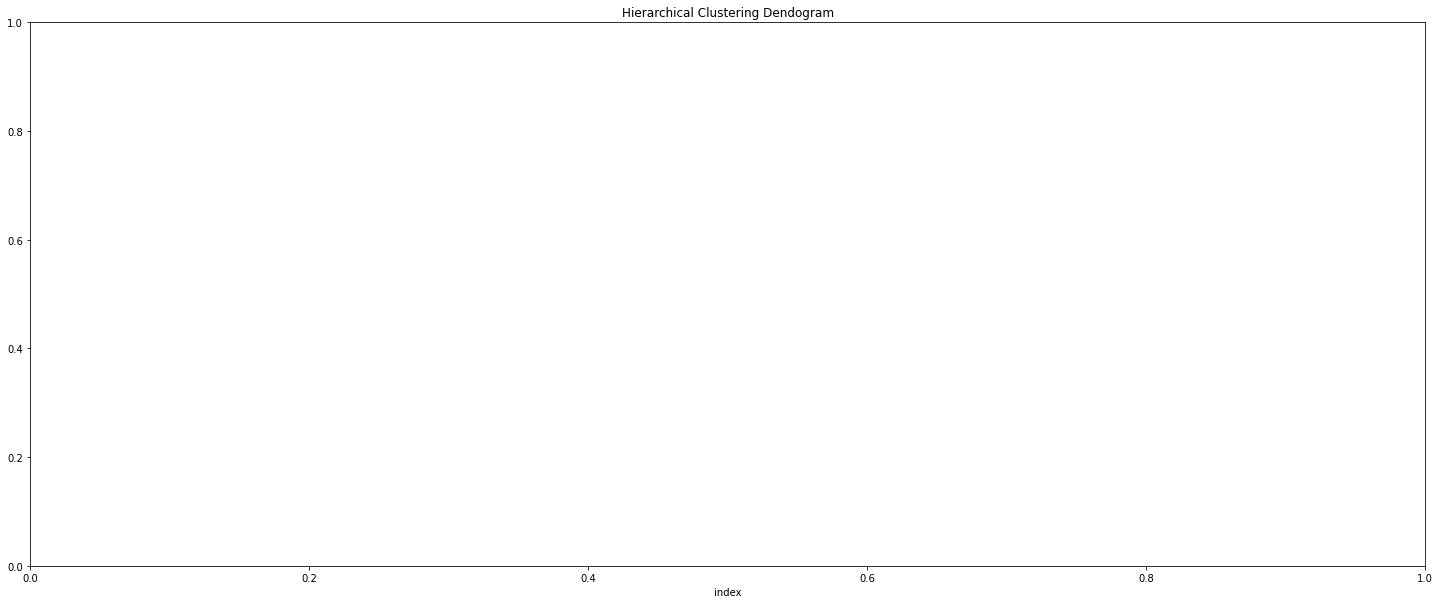

In [22]:
plt.figure(figsize = (25,10));plt.title('Hierarchical Clustering Dendogram');plt.xlabel('index')

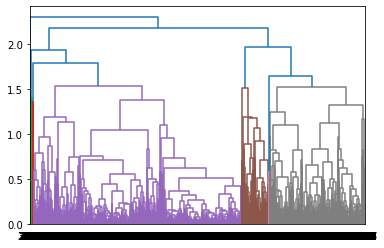

In [24]:
sch.dendrogram(
                z,
                leaf_rotation=0,
                leaf_font_size=10
)
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
h_complete= AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean').fit(def_norm)

In [39]:
cluster_labels=pd.Series(h_complete.labels_)
airline['clust']=cluster_labels

In [40]:
airline=airline.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]

In [46]:
airline

,clust,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,2,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,2,19244,0,1,1,1,215,2,0,0,6968,0
2,2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,2,4,14776,0,1,1,1,500,1,0,0,6952,0
4,0,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,0,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,0,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,2,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [48]:
airline.iloc[:,2:].groupby(airline.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,97189.586113,239.728387,2.670524,1.007488,1.014295,28739.993193,15.588836,801.789653,2.449285,4628.761743,1.000000
1,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
2,59791.056611,88.188836,1.703484,1.018606,1.011085,10324.882423,9.192003,230.441013,0.672209,3824.887965,0.003167
